<a href="https://colab.research.google.com/github/Smrutiprajna-001/Stock_price_prediction/blob/main/stockprice_prediction(Smrutiprajna_Nayak_CL2025022401998533).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# random seed for predictability
np.random.seed(40)

# generate synthetic data(1500)
pcp=np.random.randint(150,4000,1500)   #previous close price
ma_5=np.random.randint(100,3500,1500)  #5day moving average
traders_no=np.random.randint(100000,320000,1500)   # tradres no
RSI=np.random.randint(0,100,1500)      #Relative strength index
Day=np.random.randint(0,6,1500)  #day of week(o-sunday)

# generate price with some noise
price=(0.5*pcp)+(0.4*ma_5)+(0.0000006*traders_no)+(0.3*RSI)+(0.1*Day)

# create dataframe
df=pd.DataFrame({"PCP":pcp,"MA_5":ma_5,"Tradersno":traders_no,"RSI":RSI,"DAY":Day,"Price":price})

# save tocsv
csv_filename="stock_price_data.csv"
df.to_csv(csv_filename,index=False)

print(f"Dataset saved as'{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset saved as'stock_price_data.csv' with 1500 rows and 6 columns.


In [ ]:
import pandas as pd

# load dataset
df=pd.read_csv("stock_price_data.csv")



In [ ]:
# check for missing values
print("\nMissing values:\n", df.isnull().sum())

# summary stastistics
print("\nDataset Summary:\n",df.describe())


Missing values:
 PCP          0
MA_5         0
Tradersno    0
RSI          0
DAY          0
Price        0
dtype: int64

Dataset Summary:
                PCP         MA_5      Tradersno          RSI          DAY  \
count  1500.000000  1500.000000    1500.000000  1500.000000  1500.000000   
mean   2057.885333  1806.410000  207950.163333    49.461333     2.484667   
std    1104.534500   973.849687   63251.771442    29.131374     1.694603   
min     156.000000   100.000000  100060.000000     0.000000     0.000000   
25%    1077.000000   994.750000  153221.250000    25.000000     1.000000   
50%    2018.000000  1835.500000  206226.000000    49.000000     3.000000   
75%    3020.250000  2643.000000  261269.500000    76.000000     4.000000   
max    3995.000000  3497.000000  319658.000000    99.000000     5.000000   

             Price  
count  1500.000000  
mean   1766.718303  
std     688.069620  
min     238.858501  
25%    1240.040424  
50%    1792.646644  
75%    2295.869780  
max    

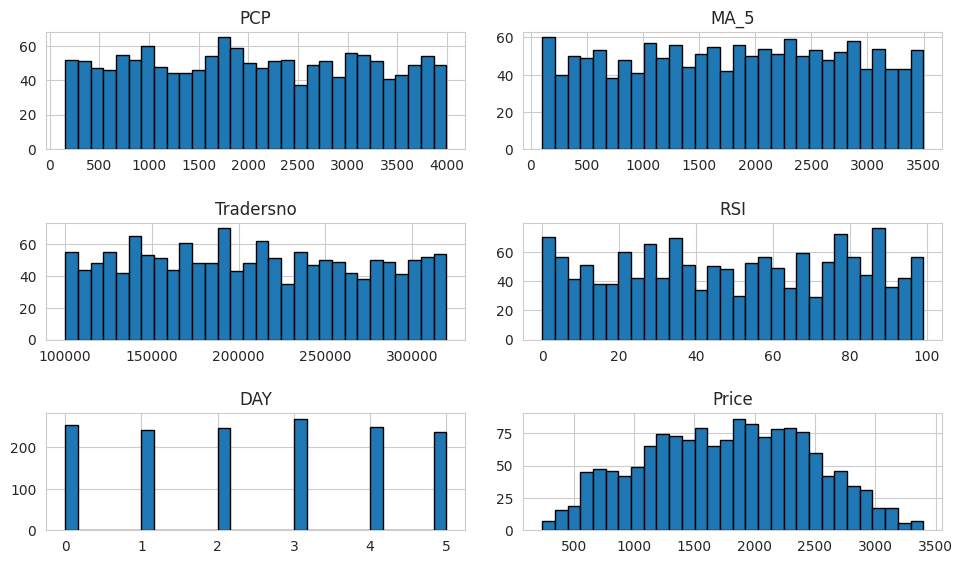

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
sns.set_style("whitegrid")

# plot features distribution
df.hist(figsize=(10,6), bins=30, edgecolor="black")
plt.tight_layout(pad=2.0)
plt.show()

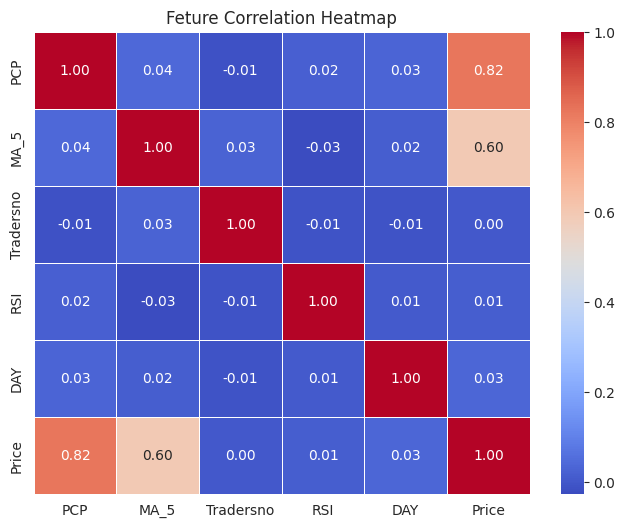

In [ ]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Feture Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# select feature &target
x = df[["PCP", "MA_5", "Tradersno", "RSI","DAY"]]

y=df["Price"]

# split data into traing and testing sets

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2 , random_state=42)

# train linera regression
model=LinearRegression()
model.fit(x_train,y_train)

# predictons
y_pred=model.predict(x_test)


# model performance
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"\nModel Performance:\nMAE:{mae:.2f},R2 Score:{r2:.2f}")


Model Performance:
MAE:0.00,R2 Score:1.00


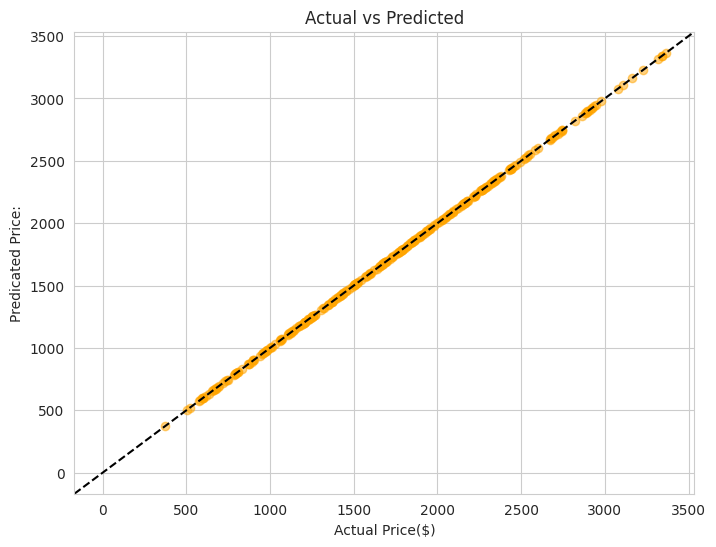

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color="orange")
plt.xlabel("Actual Price($)")
plt.ylabel("Predicated Price:")
plt.title("Actual vs Predicted")
plt.axline([0,0],slope=1,color="black", linestyle="--")
plt.show()